Springboard Capstone 2 Exploratory Data Analysis

In [1]:
#!pip3 install library
#!brew install library
#!conda install library

In [2]:
#import relevant modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np


from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Join dfs to make one clean df

In [3]:
teams = pd.read_csv('./data/teams.csv')
scores = pd.read_csv('./data/scores.csv')
print(teams.shape)
scores.shape

(44, 9)


(11027, 18)

In [4]:
#visualize structure of teams df
teams.head(2)

,Unnamed: 0,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West


In [5]:
#visualize structure of scores df
scores.head(2)

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN
1,538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain


In [6]:
#trim to data that will be included in master df
teams_keep = teams[['team_name', 'team_id' , 'team_conference' , 'team_division']]
teams_keep = teams_keep.set_index('team_name')
teams_keep.head(3)

,team_id,team_conference,team_division
team_name,,,
Arizona Cardinals,ARI,NFC,NFC West
Atlanta Falcons,ATL,NFC,NFC South
Baltimore Colts,IND,AFC,NaN


In [7]:
#merge the team info into scores - for the home team
score_w_home = scores.merge(teams_keep, left_on='team_home', right_on='team_name', how='left', 
                            suffixes=[None,'_home']).rename(columns = {'team_id':'home_id', 
                                                                       'team_conference':'home_conf',
                                                                       'team_division':'home_div'})
score_w_home.head(2)

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,...,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_id,home_conf,home_div
0,350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,...,43,Orange Bowl,True,60.0,12.0,74.0,NaN,GB,NFC,NFC North
1,538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,...,40,Orange Bowl,True,66.0,12.0,80.0,rain,IND,AFC,NaN


In [8]:
#merge the team info into scores AGAIN - for the AWAY team
#this creates one master df that includes all information for future modeling
#    to be manipulated below
big_df = score_w_home.merge(teams_keep, left_on='team_away', right_on='team_name', how='left', 
                            suffixes=[None,'_away']).rename(columns = {'team_id':'away_id', 
                                                                       'team_conference':'away_conf',
                                                                       'team_division':'away_div'})
big_df.head(2)

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,...,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_id,home_conf,home_div,away_id,away_conf,away_div
0,350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,...,60.0,12.0,74.0,NaN,GB,NFC,NFC North,LVR,AFC,AFC West
1,538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,...,66.0,12.0,80.0,rain,IND,AFC,NaN,NYJ,NFC,AFC East


Now all relevent input data is in one df, we'll make our two target columns for future modeling


In [9]:
big_df['sum_score'] = big_df['score_home'] + big_df['score_away']
big_df['h_true_point_dif'] = big_df['score_home'] - big_df['score_away']

big_df.head(2)

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,...,weather_humidity,weather_detail,home_id,home_conf,home_div,away_id,away_conf,away_div,sum_score,h_true_point_dif
0,350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,...,74.0,NaN,GB,NFC,NFC North,LVR,AFC,AFC West,47,19
1,538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,...,80.0,rain,IND,AFC,NaN,NYJ,NFC,AFC East,23,-9


In [10]:
big_df.columns

Index(['Unnamed: 0', 'schedule_date', 'schedule_season', 'schedule_week',
       'schedule_playoff', 'team_home', 'score_home', 'score_away',
       'team_away', 'team_favorite_id', 'spread_favorite', 'over_under_line',
       'stadium', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'weather_detail', 'home_id', 'home_conf',
       'home_div', 'away_id', 'away_conf', 'away_div', 'sum_score',
       'h_true_point_dif'],
      dtype='object')

In [11]:
#isolate betting info for processing
betting = big_df[['home_id','away_id', 'team_favorite_id','spread_favorite', 'over_under_line', 'sum_score' , 'h_true_point_dif']]
betting.head()

,home_id,away_id,team_favorite_id,spread_favorite,over_under_line,sum_score,h_true_point_dif
0,GB,LVR,GB,-13.5,43,47,19
1,IND,NYJ,IND,-18.0,40,23,-9
2,KC,MIN,MIN,-12.0,39,30,16
3,IND,DAL,IND,-2.5,36,29,3
4,DAL,MIA,DAL,-6.0,34,27,21


In [12]:
#define function to format the spread to be positive or negative to reflect the home team's perspective

def make_spread_home(home_id, team_favorite_id, spread_favorite):
    if home_id != team_favorite_id:
        home_spread = spread_favorite*(-1)
        return home_spread
    return spread_favorite
    

In [13]:
#apply make_spread_home func -create spread prediction column to always define spread in terms of home teams chance to win

big_df['home_pred_spread'] = big_df.apply(lambda row: make_spread_home(row['home_id'], row['team_favorite_id'], row['spread_favorite']), axis=1)

In [14]:
#initial look - is now the time to get rid of any clearly redundant columns?
#     -> e.g. we no longer need the spread_favorite col, as all data transferred to home_pred_spread
#big_df.info()
main_df = big_df.drop(columns = ['Unnamed: 0' , 'spread_favorite' , 'stadium' ], axis=1)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11027 entries, 0 to 11026
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        11027 non-null  object 
 1   schedule_season      11027 non-null  int64  
 2   schedule_week        11027 non-null  object 
 3   schedule_playoff     11027 non-null  bool   
 4   team_home            11027 non-null  object 
 5   score_home           11027 non-null  int64  
 6   score_away           11027 non-null  int64  
 7   team_away            11027 non-null  object 
 8   team_favorite_id     11027 non-null  object 
 9   over_under_line      11027 non-null  object 
 10  stadium_neutral      11027 non-null  bool   
 11  weather_temperature  10050 non-null  float64
 12  weather_wind_mph     10034 non-null  float64
 13  weather_humidity     6369 non-null   float64
 14  weather_detail       2761 non-null   object 
 15  home_id              11027 non-null 

In [15]:
main_df.head(13)   #finding the first game in our records with betting data that was not a superbowl
#looks like that is in the 1979 season, so it feels safe to exclude those preceding superbowls, as teams'
    #success 50+ years ago is very unlikely to help predict future games

main_df = main_df.iloc[12:,:]

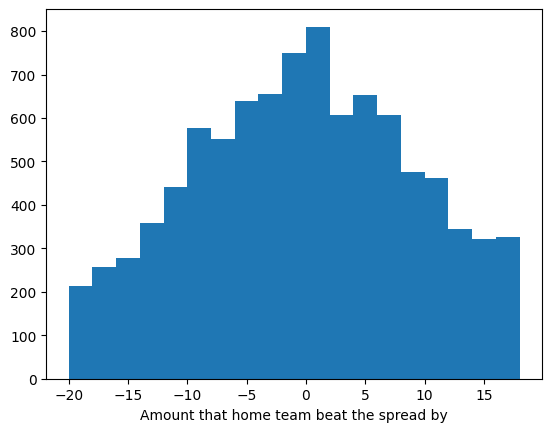

In [16]:
#check out historical distribution of the difference between predicted spread and true game spread

score_difs = main_df.h_true_point_dif + main_df.home_pred_spread
bins = range(-20, 20, 2)
plt.hist(score_difs, bins=bins);
plt.xlabel('Amount that home team beat the spread by')

main_df['home_ATS'] = score_difs


In [17]:
#view stats on historical spread 
score_difs.describe()

count    11015.000000
mean         0.195415
std         13.340172
min        -52.000000
25%         -8.500000
50%          0.000000
75%          8.500000
max         50.500000
dtype: float64

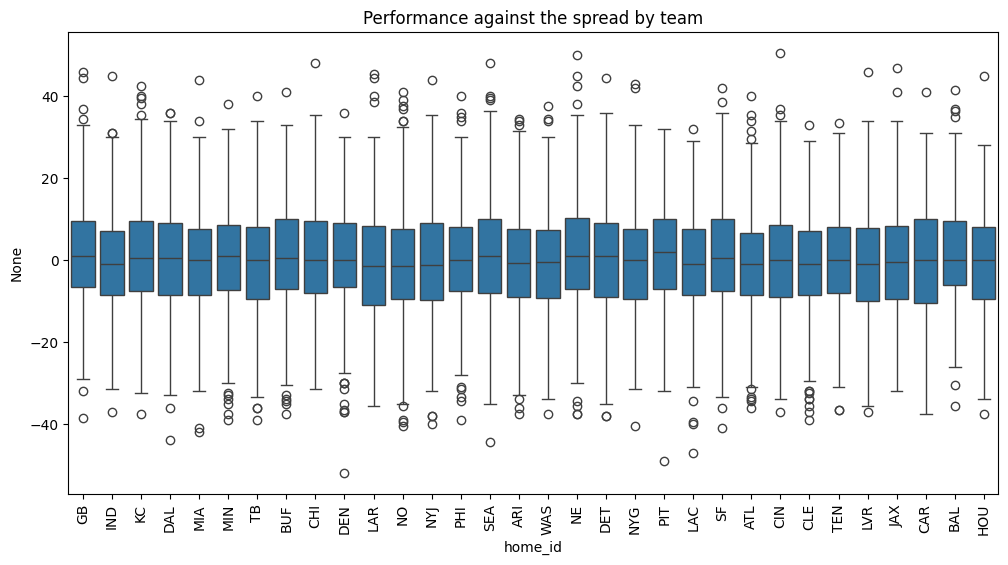

In [18]:
plt.subplots(figsize=(12, 6))
sns.boxplot(x='home_id', y= score_difs, data=big_df)
plt.xticks(rotation='vertical');
plt.title('Performance against the spread by team');

<Axes: >

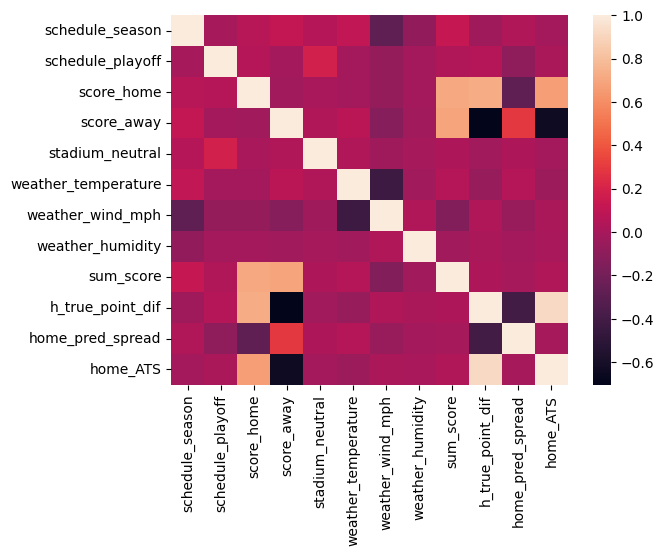

In [19]:
sns.heatmap(main_df.corr(numeric_only=True))

Looking into importance of recency. To develop an idea of how far back in time models should be developed from. for example, the 1977 dolphins probably aren't a valid predictor for the 2023 fins success.

In [20]:
dif_sum_2022_h = main_df[main_df['schedule_season'] == 2022].groupby('home_id')['h_true_point_dif'].mean()
dif_sum_2022_a = (-1)*main_df[main_df['schedule_season'] == 2022].groupby('away_id')['h_true_point_dif'].mean()
for i in range(len(dif_sum_2022_a)):
    print(dif_sum_2022_h[i] + dif_sum_2022_a[i])

-12.48611111111111
-3.0416666666666665
3.15
17.05
-3.6666666666666665
-16.444444444444443
13.431818181818182
-2.0277777777777777
14.533333333333335
-8.027777777777779
2.2777777777777777
-0.44444444444444464
-15.791666666666668
-15.666666666666666
5.088888888888889
14.0
0.42500000000000004
-9.51388888888889
-2.4444444444444446
0.7249999999999996
-1.475
2.0694444444444446
-1.9722222222222223
-2.9444444444444446
-2.3194444444444446
17.916666666666664
-4.041666666666667
-1.333333333333333
16.424242424242426
-7.15
-7.055555555555555
-2.5972222222222223


/var/folders/_w/xxwqncbj69xfsg6qtjh7f1640000gn/T/ipykernel_29925/140280364.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(dif_sum_2022_h[i] + dif_sum_2022_a[i])


In [21]:
mean_difs_running = pd.DataFrame()
boop=[]
j=0
for i in range(30,3000,15):
    dif_sum_h = main_df.iloc[(-i):,:].groupby('home_id')['h_true_point_dif'].mean()
    dif_sum_a = (-1)*main_df.iloc[(-i):,:].groupby('away_id')['h_true_point_dif'].mean()
    boop.append(dif_sum_h[1] + dif_sum_a[1])

#print(boop);

/var/folders/_w/xxwqncbj69xfsg6qtjh7f1640000gn/T/ipykernel_29925/1388737057.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  boop.append(dif_sum_h[1] + dif_sum_a[1])
/var/folders/_w/xxwqncbj69xfsg6qtjh7f1640000gn/T/ipykernel_29925/1388737057.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  boop.append(dif_sum_h[1] + dif_sum_a[1])
/var/folders/_w/xxwqncbj69xfsg6qtjh7f1640000gn/T/ipykernel_29925/1388737057.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

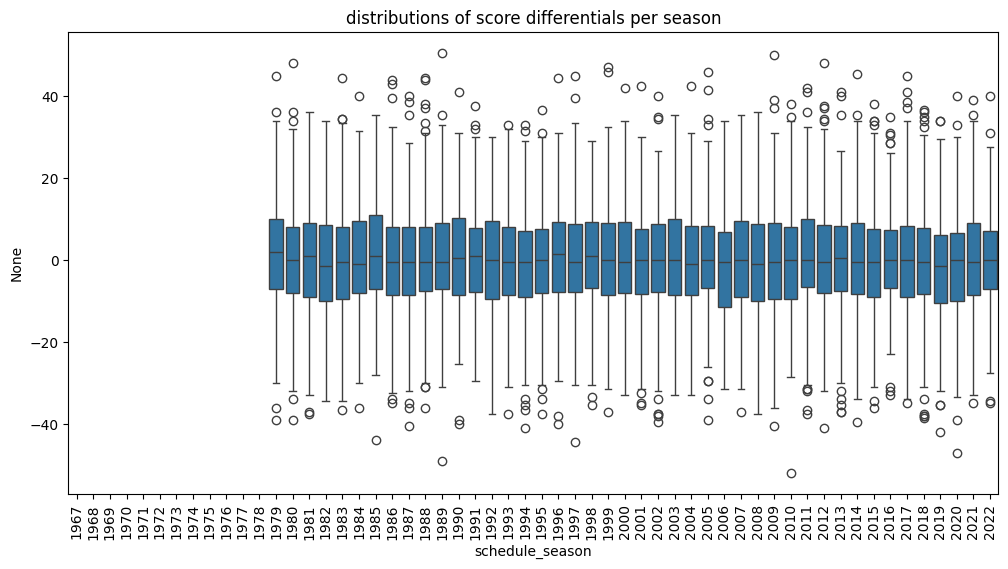

In [22]:
#how do average performances against the spread change from season to season?
plt.subplots(figsize=(12, 6))
sns.boxplot(x='schedule_season', y= score_difs, data=big_df)
plt.xticks(rotation='vertical');
plt.title('distributions of score differentials per season');

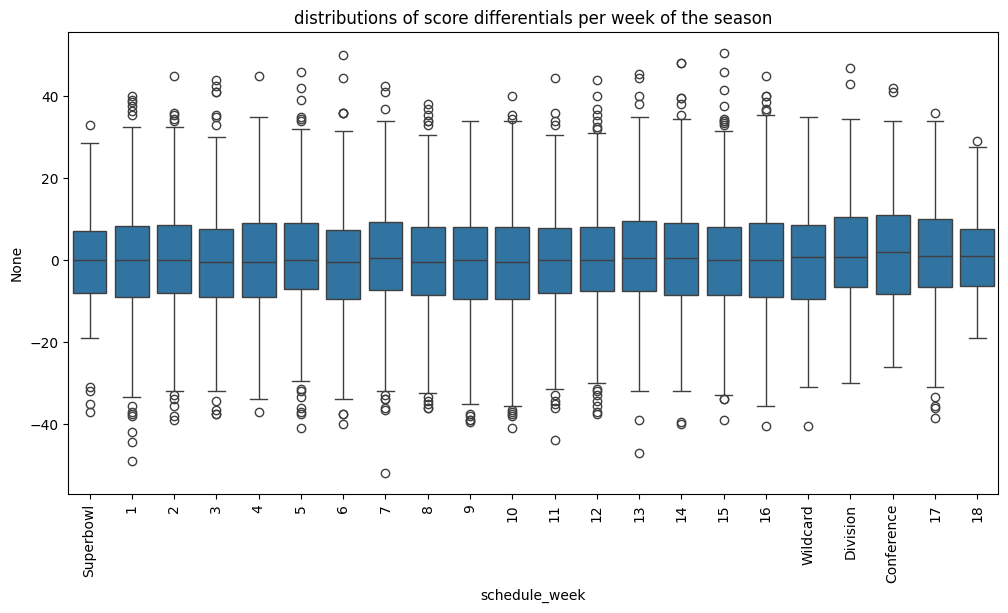

In [23]:
#how do average performances against the spread change throughout one season?
plt.subplots(figsize=(12, 6))
sns.boxplot(x='schedule_week', y= score_difs, data=big_df)
plt.xticks(rotation='vertical');
plt.title('distributions of score differentials per week of the season');


#there appears to be slightly less variability in the playoffs than in the regular season, 
#   but it is hard to claim significance of this apparent trend
#There also may be a lull in variation, meaning more accurate predictions from the sports book
#   During the middle of the season, roughly weeks 8-10

In [24]:
#compare in general how various weather conditions affect spread stats 
#reminder from above: score_difs is the amount that home team beat the spread by
print('By how much do home teams beat the spread in different weather?')

main_df.groupby(['weather_detail'])['home_ATS'].describe()

By how much do home teams beat the spread in different weather?


,count,mean,std,min,25%,50%,75%,max
weather_detail,,,,,,,,
fog,28.0,5.946429,13.261151,-16.5,-4.125,4.25,13.625,29.5
indoor,2509.0,-0.041849,13.492963,-47.0,-9.000,-0.50,8.000,45.5
rain,108.0,1.662037,13.764852,-35.5,-6.000,0.00,10.000,36.5
rain | fog,22.0,5.954545,16.668983,-18.5,-4.500,3.75,10.375,50.0
retractable (open roof),69.0,-1.391304,13.188361,-34.0,-9.500,-0.50,6.500,31.5
snow,15.0,-4.000000,15.003571,-26.0,-13.250,-5.00,4.000,28.5
snow | Freezing rain,1.0,-3.000000,NaN,-3.0,-3.000,-3.00,-3.000,-3.0
snow | fog,5.0,-4.900000,11.696153,-19.0,-9.000,-9.00,0.500,12.0


In [25]:
#Q: can we justify getting rid of divisions for modeling?
print('Does spread performance trend with division?')
main_df.groupby(['home_div'])['home_ATS'].describe()

#A: Most likely. All divisions have similar mean, spread, and median

Does spread performance trend with division?


,count,mean,std,min,25%,50%,75%,max
home_div,,,,,,,,
AFC East,1459.0,0.664496,13.602631,-42.0,-8.5,0.0,9.0,50.0
AFC North,1287.0,0.536519,13.142412,-49.0,-7.5,0.0,8.5,50.5
AFC South,930.0,-0.181183,12.958397,-37.5,-8.5,-0.5,7.5,47.0
AFC West,1330.0,0.411654,13.226435,-52.0,-8.0,-0.5,9.0,46.0
NFC East,1469.0,-0.070796,13.297442,-44.0,-8.5,0.0,8.0,43.0
NFC North,1445.0,0.840830,13.226856,-39.0,-7.5,0.5,9.0,48.0
NFC South,1307.0,-0.787299,13.452724,-40.5,-9.5,-0.5,7.5,41.0
NFC West,1173.0,0.320546,13.726748,-44.5,-8.5,0.0,9.0,48.0


In [26]:
print('How about Conferences?')
main_df.groupby(['home_conf'])['home_ATS'].describe()

#A: Most likely not valuable to modeling, with similar spread and mean
#   and median both below 1

How about Conferences?


,count,mean,std,min,25%,50%,75%,max
home_conf,,,,,,,,
AFC,4980.0,0.386345,13.191497,-52.0,-8.0,0.0,8.5,50.5
NFC,6035.0,0.037862,13.460672,-44.5,-9.0,0.0,8.5,48.0


In [27]:
#this cell serves to format main_df.over_under_line to be usable in the below cell
#main_df.over_under_line.unique()

filt = main_df['over_under_line'].str.contains(' ')
main_df = main_df[~filt]
main_df['over_under_line'] = main_df['over_under_line'].astype(float)

slope =  -0.011425660331590202
intercept =  0.6594597965044507


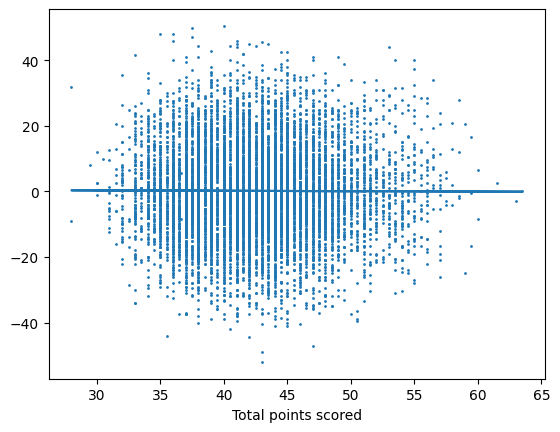

In [28]:
#Now, let's look at how the predicted total score in a game affects the home team's 
#  liklihood of beating the spread:

plt.scatter(x=main_df.over_under_line, y=main_df.home_ATS, s=1);
plt.xlabel('Total points scored')

m, b = np.polyfit(x=main_df.over_under_line.astype(float), y=main_df.home_ATS, deg=1)
plt.plot(main_df.over_under_line, float(m)*(main_df.over_under_line)+b)
print('slope = ', m)
print('intercept = ', b)

#A: for each additional 10 points predicted, home team expected to do 1 point worse ATS
#.  not large, but possibly worth keeping?

In [29]:
# Identify fields that should not be included - to remove
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10953 entries, 12 to 11026
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        10953 non-null  object 
 1   schedule_season      10953 non-null  int64  
 2   schedule_week        10953 non-null  object 
 3   schedule_playoff     10953 non-null  bool   
 4   team_home            10953 non-null  object 
 5   score_home           10953 non-null  int64  
 6   score_away           10953 non-null  int64  
 7   team_away            10953 non-null  object 
 8   team_favorite_id     10953 non-null  object 
 9   over_under_line      10953 non-null  float64
 10  stadium_neutral      10953 non-null  bool   
 11  weather_temperature  10034 non-null  float64
 12  weather_wind_mph     10018 non-null  float64
 13  weather_humidity     6358 non-null   float64
 14  weather_detail       2753 non-null   object 
 15  home_id              10953 non-null  obj

In [30]:
#remove fields with little to no correlation to ATS outcome
main_df = main_df.drop(columns= ['away_conf', 'home_conf', 'away_div', 'home_div'])

#remove fields that include game data - i.e. will not be availabe for modeling future games
main_df = main_df.drop(columns = ['sum_score','h_true_point_dif', 'sum_score', 'score_home', 'score_away' ])

main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10953 entries, 12 to 11026
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        10953 non-null  object 
 1   schedule_season      10953 non-null  int64  
 2   schedule_week        10953 non-null  object 
 3   schedule_playoff     10953 non-null  bool   
 4   team_home            10953 non-null  object 
 5   team_away            10953 non-null  object 
 6   team_favorite_id     10953 non-null  object 
 7   over_under_line      10953 non-null  float64
 8   stadium_neutral      10953 non-null  bool   
 9   weather_temperature  10034 non-null  float64
 10  weather_wind_mph     10018 non-null  float64
 11  weather_humidity     6358 non-null   float64
 12  weather_detail       2753 non-null   object 
 13  home_id              10953 non-null  object 
 14  away_id              10953 non-null  object 
 15  home_pred_spread     10953 non-null  flo

In [31]:
main_df.to_csv('./data/nfl_data_clean.csv')

In [32]:
main_df.head(3)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,over_under_line,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_id,away_id,home_pred_spread,home_ATS
12,9/1/1979,1979,1,False,Tampa Bay Buccaneers,Detroit Lions,TB,30.0,False,79.0,9.0,87.0,NaN,TB,DET,-3.0,12.0
13,9/2/1979,1979,1,False,Buffalo Bills,Miami Dolphins,MIA,39.0,False,74.0,15.0,74.0,NaN,BUF,MIA,5.0,3.0
14,9/2/1979,1979,1,False,Chicago Bears,Green Bay Packers,CHI,31.0,False,78.0,11.0,68.0,NaN,CHI,GB,-3.0,0.0


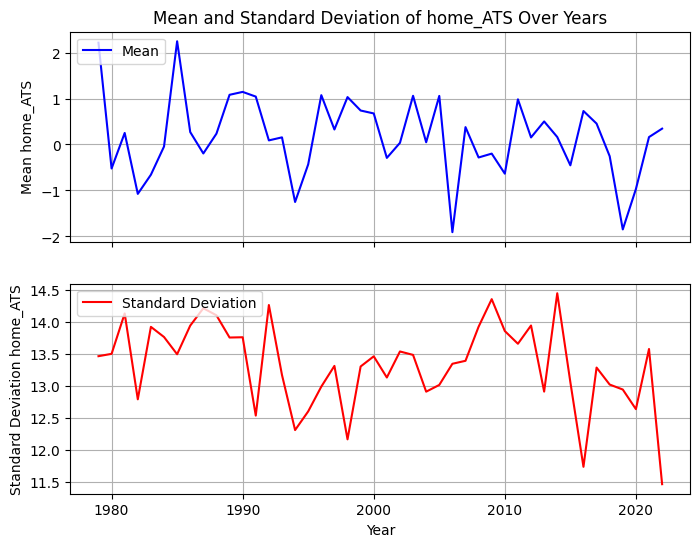

In [35]:
# Convert the 'schedule_date' to a datetime object
main_df['schedule_date'] = pd.to_datetime(main_df['schedule_date'])

# Group the data by 'schedule_season' and calculate the mean and standard deviation
season_means = main_df.groupby('schedule_season')['home_ATS'].mean()
season_stds = main_df.groupby('schedule_season')['home_ATS'].std()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# Plot the mean of 'home_ATS' on the first subplot
ax1.plot(season_means.index, season_means.values, label='Mean', color='b')
ax1.set_ylabel('Mean home_ATS', color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.set_title('Mean and Standard Deviation of home_ATS Over Years')
ax1.grid()

# Plot the standard deviation of 'home_ATS' on the second subplot
ax2.plot(season_stds.index, season_stds.values, label='Standard Deviation', color='r')
ax2.set_xlabel('Year')
ax2.set_ylabel('Standard Deviation home_ATS', color='k')
ax2.tick_params(axis='y', labelcolor='k')
ax2.grid()

# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')